In [1]:
import pandas as pd
import os

os.chdir('E:/석사 3기/DKSUS/')
df_area = pd.read_csv('FAOSTAT_data_area.csv')
df_yield = pd.read_csv('FAOSTAT_data_yield.csv')

I made two datafram with SouthEast Asia's harvested area and agriculture yield data.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df_area.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,26,Brunei Darussalam,5312,Area harvested,486,Bananas,2016,2016,ha,540.0,Im,FAO data based on imputation methodology
1,QCL,Crops and livestock products,26,Brunei Darussalam,5312,Area harvested,486,Bananas,2017,2017,ha,609.0,Im,FAO data based on imputation methodology
2,QCL,Crops and livestock products,26,Brunei Darussalam,5312,Area harvested,486,Bananas,2018,2018,ha,617.0,Im,FAO data based on imputation methodology
3,QCL,Crops and livestock products,26,Brunei Darussalam,5312,Area harvested,486,Bananas,2019,2019,ha,668.0,Im,FAO data based on imputation methodology
4,QCL,Crops and livestock products,26,Brunei Darussalam,5312,Area harvested,486,Bananas,2020,2020,ha,599.0,Im,FAO data based on imputation methodology


In [4]:
df_yield.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,26,Brunei Darussalam,5419,Yield,486,Bananas,2016,2016,hg/ha,30185,Fc,Calculated data
1,QCL,Crops and livestock products,26,Brunei Darussalam,5419,Yield,486,Bananas,2017,2017,hg/ha,29918,Fc,Calculated data
2,QCL,Crops and livestock products,26,Brunei Darussalam,5419,Yield,486,Bananas,2018,2018,hg/ha,29530,Fc,Calculated data
3,QCL,Crops and livestock products,26,Brunei Darussalam,5419,Yield,486,Bananas,2019,2019,hg/ha,29087,Fc,Calculated data
4,QCL,Crops and livestock products,26,Brunei Darussalam,5419,Yield,486,Bananas,2020,2020,hg/ha,28664,Fc,Calculated data


In [5]:
df_area.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2415 entries, 0 to 2414
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       2415 non-null   object 
 1   Domain            2415 non-null   object 
 2   Area Code (FAO)   2415 non-null   int64  
 3   Area              2415 non-null   object 
 4   Element Code      2415 non-null   int64  
 5   Element           2415 non-null   object 
 6   Item Code (FAO)   2415 non-null   int64  
 7   Item              2415 non-null   object 
 8   Year Code         2415 non-null   int64  
 9   Year              2415 non-null   int64  
 10  Unit              2415 non-null   object 
 11  Value             2270 non-null   float64
 12  Flag              1353 non-null   object 
 13  Flag Description  2415 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 264.3+ KB


In [6]:
df_yield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2250 entries, 0 to 2249
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Domain Code       2250 non-null   object
 1   Domain            2250 non-null   object
 2   Area Code (FAO)   2250 non-null   int64 
 3   Area              2250 non-null   object
 4   Element Code      2250 non-null   int64 
 5   Element           2250 non-null   object
 6   Item Code (FAO)   2250 non-null   int64 
 7   Item              2250 non-null   object
 8   Year Code         2250 non-null   int64 
 9   Year              2250 non-null   int64 
 10  Unit              2250 non-null   object
 11  Value             2250 non-null   int64 
 12  Flag              2250 non-null   object
 13  Flag Description  2250 non-null   object
dtypes: int64(6), object(8)
memory usage: 246.2+ KB


Summary tables about df_area and df_yield.
However, I will use only 'Value' column.

In [7]:
df_area.describe()

,Area Code (FAO),Element Code,Item Code (FAO),Year Code,Year,Value
count,2415.000000,2415.0,2415.000000,2415.000000,2415.000000,2.270000e+03
mean,143.979296,5312.0,414.565217,2018.000000,2018.000000,2.770851e+05
std,65.110317,0.0,223.785060,1.414506,1.414506,1.203138e+06
min,26.000000,5312.0,15.000000,2016.000000,2016.000000,0.000000e+00
25%,101.000000,5312.0,234.000000,2017.000000,2017.000000,1.401000e+03
50%,131.000000,5312.0,402.000000,2018.000000,2018.000000,1.139950e+04
75%,200.000000,5312.0,574.000000,2019.000000,2019.000000,8.799725e+04
max,237.000000,5312.0,836.000000,2020.000000,2020.000000,1.499601e+07


In [8]:
df_yield.describe()

,Area Code (FAO),Element Code,Item Code (FAO),Year Code,Year,Value
count,2250.000000,2250.0,2250.000000,2250.000000,2250.000000,2.250000e+03
mean,141.928889,5419.0,412.771111,2018.000000,2018.000000,9.384150e+04
std,64.969496,0.0,220.286312,1.414528,1.414528,1.341297e+05
min,26.000000,5419.0,15.000000,2016.000000,2016.000000,5.280000e+02
25%,101.000000,5419.0,234.000000,2017.000000,2017.000000,1.453250e+04
50%,131.000000,5419.0,402.500000,2018.000000,2018.000000,5.118200e+04
75%,200.000000,5419.0,574.000000,2019.000000,2019.000000,1.265465e+05
max,237.000000,5419.0,836.000000,2020.000000,2020.000000,1.276638e+06


So I made new area and yield dataframe with 'Value' column.

In [9]:
area_value = df_area['Value']

In [10]:
yield_value = df_yield['Value']

In [11]:
area_value = pd.DataFrame(area_value)

In [12]:
yield_value = pd.DataFrame(yield_value)

See distribution of each dataframe

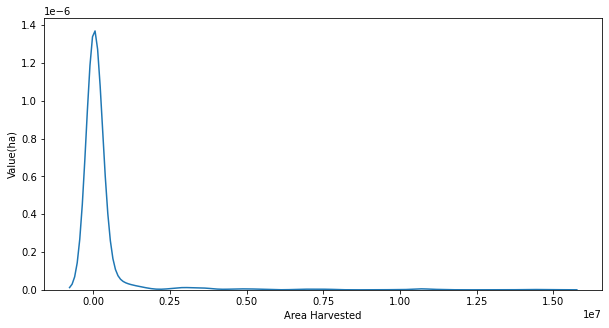

In [13]:
plt.figure(figsize=(10,5))
fig1 = sns.kdeplot(area_value['Value'])
fig1.set_xlabel("Area Harvested")
fig1.set_ylabel("Value(ha)")
plt.show()

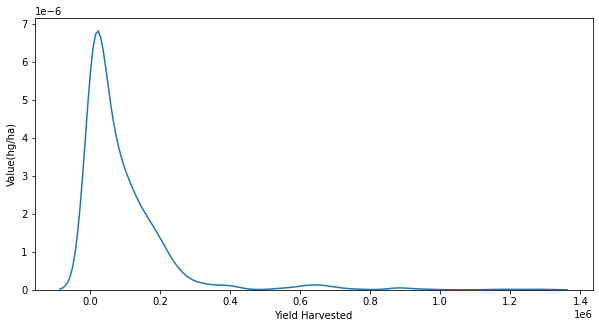

In [14]:
plt.figure(figsize=(10,5))
fig2 = sns.kdeplot(yield_value['Value'])
fig2.set_xlabel("Yield Harvested")
fig2.set_ylabel("Value(hg/ha)")
plt.show()

I did MinMaxScaler to do Standarization.
But I think it's not worked great, so it can be removed.

In [15]:
import sklearn
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

scaler.fit(area_value)
area_scaled = scaler.transform(area_value)

area_df_scaled = pd.DataFrame(data = area_scaled, columns=['Area_value'])

In [16]:
scaler.fit(yield_value)
yield_scaled = scaler.transform(yield_value)

yield_df_scaled = pd.DataFrame(data = yield_scaled, columns=['Yield_value'])

In [17]:
area_df_scaled.head()

,Area_value
0,0.000036
1,0.000041
2,0.000041
3,0.000045
4,0.000040


In [18]:
yield_df_scaled.head()

,Yield_value
0,0.023240
1,0.023031
2,0.022727
3,0.022380
4,0.022048


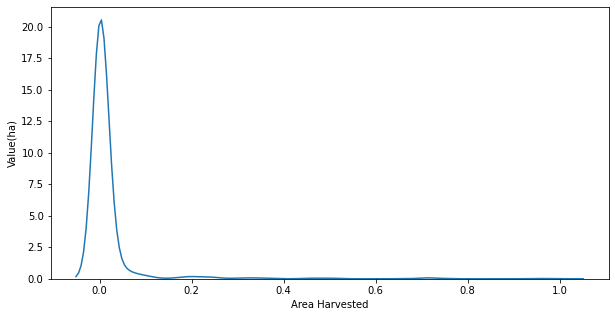

In [19]:
plt.figure(figsize=(10,5))
fig1 = sns.kdeplot(area_df_scaled['Area_value'])
fig1.set_xlabel("Area Harvested")
fig1.set_ylabel("Value(ha)")
plt.show()

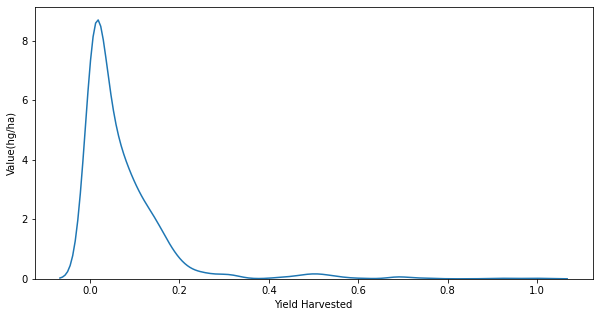

In [20]:
plt.figure(figsize=(10,5))
fig2 = sns.kdeplot(yield_df_scaled['Yield_value'])
fig2.set_xlabel("Yield Harvested")
fig2.set_ylabel("Value(hg/ha)")
plt.show()

I want to see the data with 'Year' column to find changes through the year of each area and item.

In [21]:
df_area.drop(['Domain Code','Domain','Area Code (FAO)','Element Code', 'Element','Item Code (FAO)','Item', 'Year Code', 'Unit', 'Flag','Flag Description'], axis = 1, inplace=True)

In [22]:
df_area.head()

,Area,Year,Value
0,Brunei Darussalam,2016,540.0
1,Brunei Darussalam,2017,609.0
2,Brunei Darussalam,2018,617.0
3,Brunei Darussalam,2019,668.0
4,Brunei Darussalam,2020,599.0


In [23]:
df_area.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2415 entries, 0 to 2414
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Area    2415 non-null   object 
 1   Year    2415 non-null   int64  
 2   Value   2270 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 56.7+ KB


In [24]:
area_df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2415 entries, 0 to 2414
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area_value  2270 non-null   float64
dtypes: float64(1)
memory usage: 19.0 KB


In [25]:
df_area_n = pd.concat([df_area, area_df_scaled], axis=1)

In [26]:
df_area_n

,Area,Year,Value,Area_value
0,Brunei Darussalam,2016,540.0,0.000036
1,Brunei Darussalam,2017,609.0,0.000041
2,Brunei Darussalam,2018,617.0,0.000041
3,Brunei Darussalam,2019,668.0,0.000045
4,Brunei Darussalam,2020,599.0,0.000040
...,...,...,...,...
2410,Viet Nam,2016,50031.0,0.003336
2411,Viet Nam,2017,50956.0,0.003398
2412,Viet Nam,2018,51883.0,0.003460
2413,Viet Nam,2019,58424.0,0.003896


In [27]:
df_area_n.drop('Value',axis=1, inplace=True)

In [28]:
df_area_n

,Area,Year,Area_value
0,Brunei Darussalam,2016,0.000036
1,Brunei Darussalam,2017,0.000041
2,Brunei Darussalam,2018,0.000041
3,Brunei Darussalam,2019,0.000045
4,Brunei Darussalam,2020,0.000040
...,...,...,...
2410,Viet Nam,2016,0.003336
2411,Viet Nam,2017,0.003398
2412,Viet Nam,2018,0.003460
2413,Viet Nam,2019,0.003896


In [29]:
df_area_gb = df_area_n.groupby(['Area','Year']).sum()

In [30]:
df_area_gb

Area_value
Area                             Year            
Brunei Darussalam                2016    0.000958
                                 2017    0.000967
                                 2018    0.000950
                                 2019    0.000946
                                 2020    0.000941
Cambodia                         2016    0.265313
                                 2017    0.274433
                                 2018    0.288057
                                 2019    0.281739
                                 2020    0.281739
Indonesia                        2016    2.847224
                                 2017    3.112580
                                 2018    3.191970
                                 2019    3.062447
                                 2020    3.076027
Lao People's Democratic Republic 2016    0.126223
                                 2017    0.117045
                                 2018    0.109631
                                 2019    0.106247
                                 2020    0.112880
Malaysia                         2016    0.481336
                                 2017    0.488903
                                 2018    0.494079
                                 2019    0.495403
                                 2020    0.494167
Myanmar                          2016    1.157705
                                 2017    1.147471
                                 2018    1.133753
                                 2019    1.143278
                                 2020    1.131967
Philippines                      2016    0.944250
                                 2017    0.972904
                                 2018    0.970493
                                 2019    0.958418
                                 2020    0.967342
Singapore                        2016    0.000090
                                 2017    0.000092
                                 2018    0.000096
                                 2019    0.000097
                                 2020    0.000092
Thailand                         2016    1.392703
                                 2017    1.400133
                                 2018    1.421024
                                 2019    1.374861
                                 2020    1.425036
Timor-Leste                      2016    0.009630
                                 2017    0.008785
                                 2018    0.010323
                                 2019    0.009690
                                 2020    0.009819
Viet Nam                         2016    0.942307
                                 2017    0.942358
                                 2018    0.935076
                                 2019    0.920216
                                 2020    0.901156

<AxesSubplot:xlabel='Area,Year'>

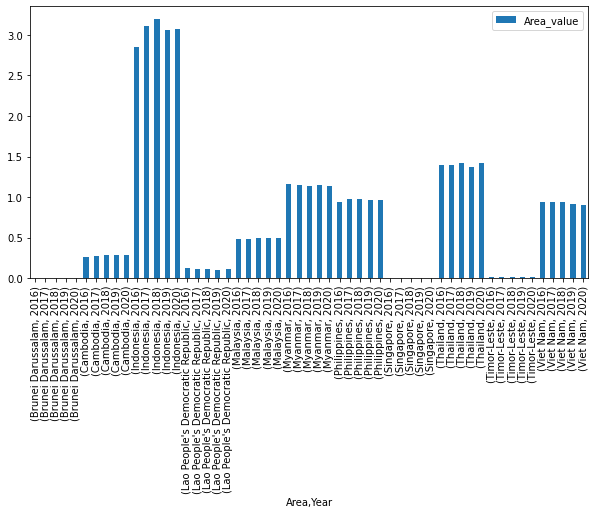

In [31]:
df_area_gb.plot(kind='bar',figsize=(10,5))

Check Brunei Darussalam, Singapore, and Timor-Leste which I cannot see in the above graph.

In [32]:
df_area_2 = df_area_n[(df_area_n['Area'] == 'Brunei Darussalam') | (df_area_n['Area'] == 'Singapore') | (df_area_n['Area'] == 'Timor-Leste')]

In [33]:
df_area_gb_n = df_area_2.groupby(['Area','Year']).sum()

<AxesSubplot:xlabel='Area,Year'>

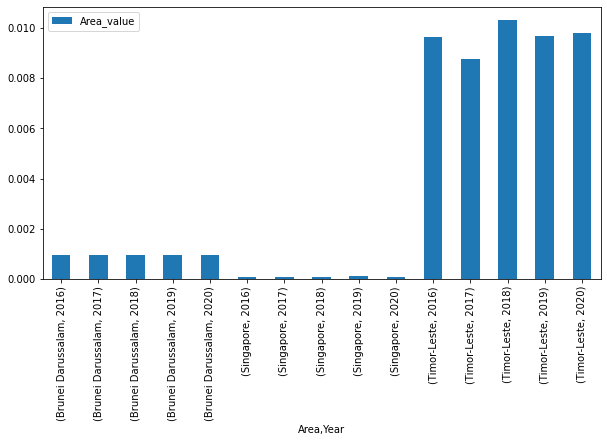

In [34]:
df_area_gb_n.plot(kind='bar',figsize=(10,5))

In [35]:
df_yield.drop(['Domain Code','Domain','Area Code (FAO)','Element Code', 'Element','Item Code (FAO)','Area', 'Year Code', 'Unit', 'Flag','Flag Description'], axis = 1, inplace=True)

In [36]:
df_yield.head()

,Item,Year,Value
0,Bananas,2016,30185
1,Bananas,2017,29918
2,Bananas,2018,29530
3,Bananas,2019,29087
4,Bananas,2020,28664


In [37]:
df_yield_n = pd.concat([df_yield, yield_df_scaled], axis=1)

In [38]:
df_yield_n.drop('Value',axis=1, inplace=True)

In [39]:
df_yield_gb = df_yield_n.groupby(['Item','Year']).sum()

In [40]:
df_yield_gb.head()

Yield_value
Item             Year             
Agave fibres nes 2016     0.007358
                 2017     0.007174
                 2018     0.007274
                 2019     0.007248
                 2020     0.007225

<AxesSubplot:xlabel='Item,Year'>

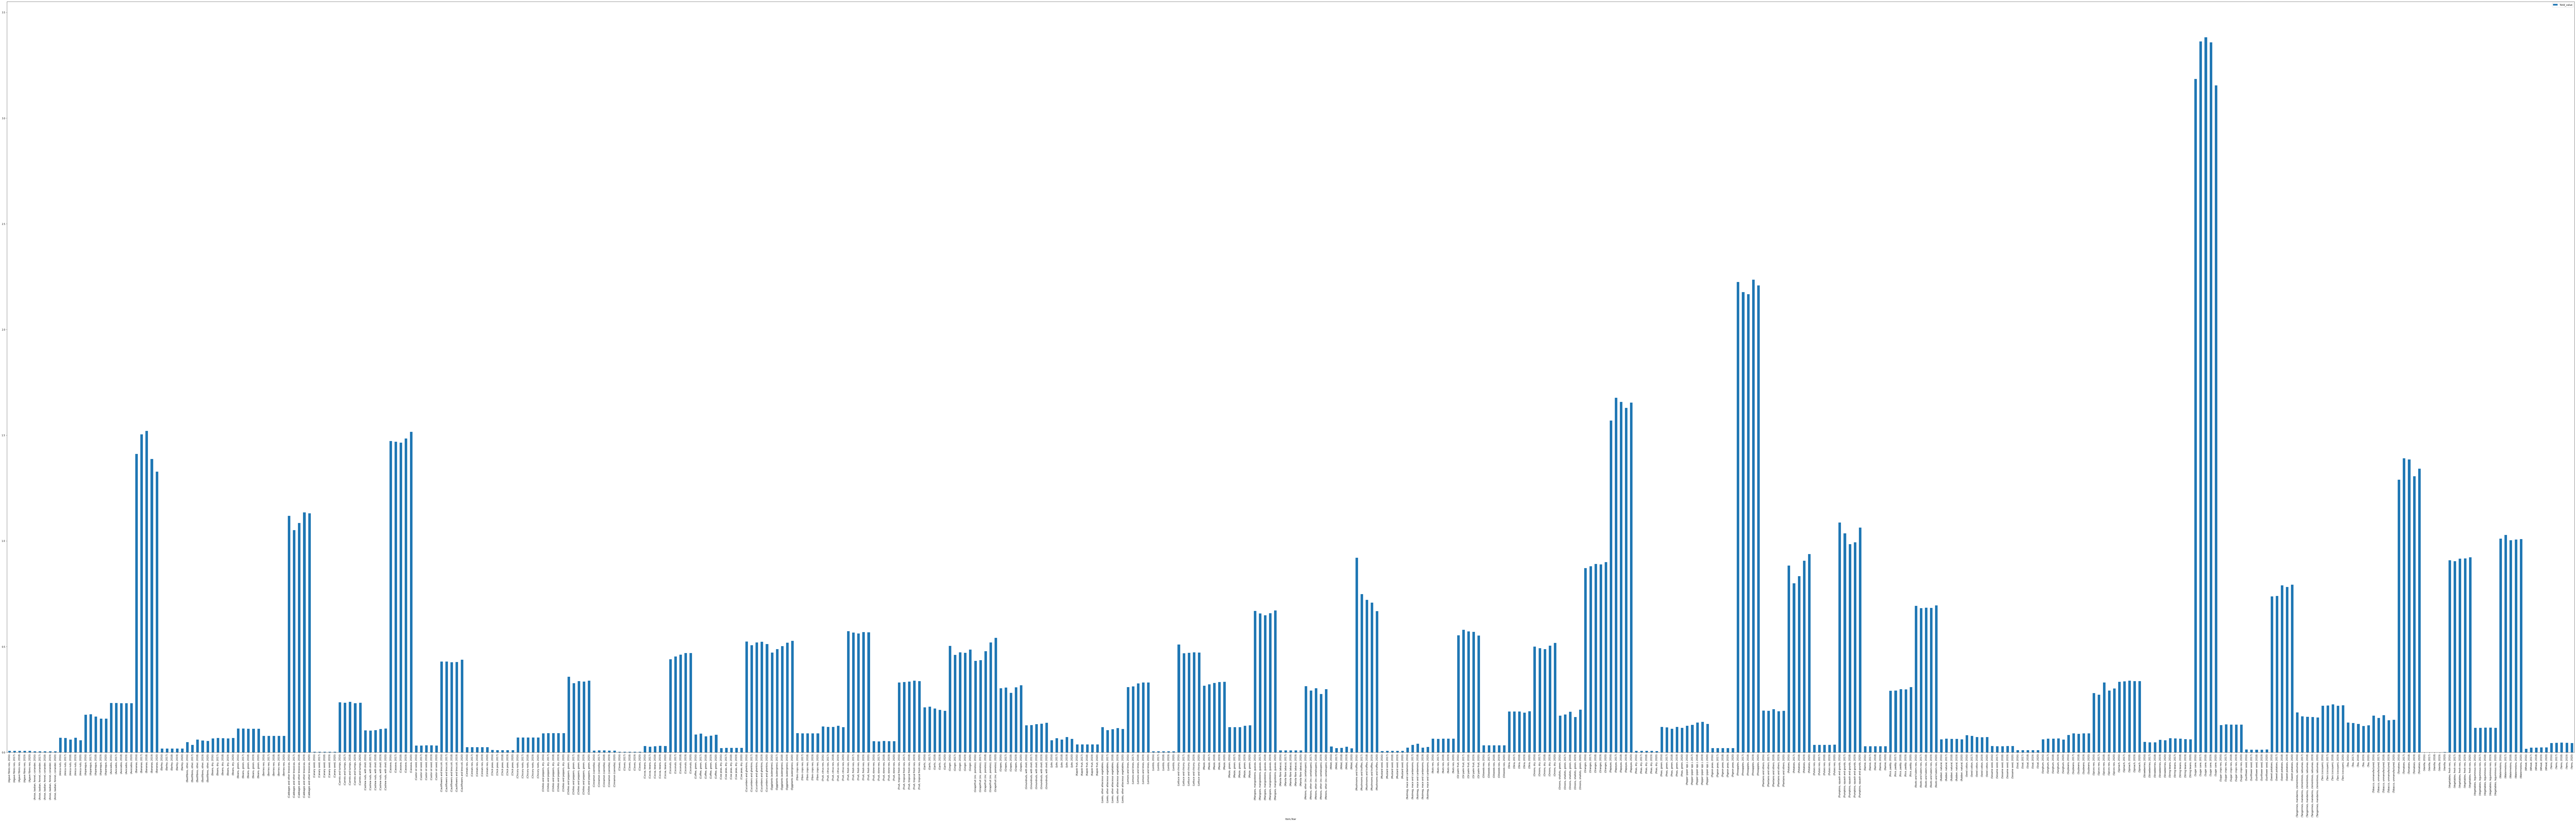

In [41]:
df_yield_gb.plot(kind='bar',figsize=(200, 60))